In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the image

A= skimage.data.page()
m, n = A.shape
print(f"A shape: {m,n}")

A shape: (191, 384)


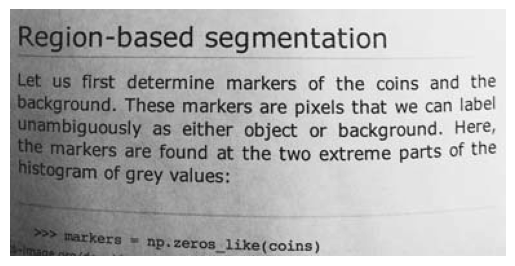

In [3]:
# Visualize the image
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
#Compute the SVD of the image
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.shape, s.shape, VT.shape)
print(f"The first ten singular values are {s[:10]}")

(191, 191) (191,) (384, 384)
The first ten singular values are [48093.64246165  3197.78043068  2707.79114876  2586.79634199
  2456.08482582  2283.09554911  2156.77301723  1964.16831736
  1616.46644148  1495.19015608]


In [5]:
#Transform the vector s into a matrix putting the values on the diagonal 
S = np.zeros((m, n))
S[:m, :m] = np.diag(s)
print(S[:,m:])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


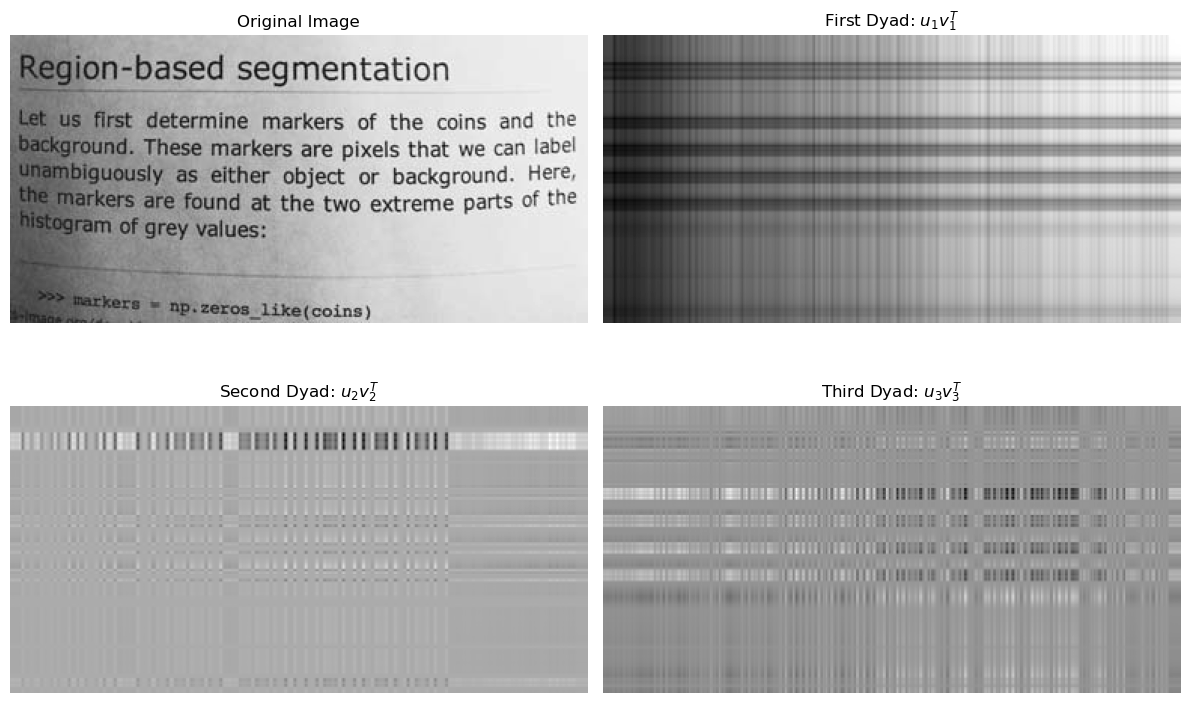

In [6]:
#Visualizing some Dyads
A1 = U[:, 0:1] @ VT[0:1, :]  
A2 = U[:, 1:2] @ VT[1:2, :]  
A3 = U[:, 2:3] @ VT[2:3, :] 


plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(A, cmap='gray')
plt.axis('off')

# First dyad
plt.subplot(2, 2, 2)
plt.title("First Dyad: $u_1 v_1^T$")
plt.imshow(A1, cmap='gray')
plt.axis('off')

# Second dyad
plt.subplot(2, 2, 3)
plt.title("Second Dyad: $u_2 v_2^T$")
plt.imshow(A2, cmap='gray')
plt.axis('off')

# Third dyad
plt.subplot(2, 2, 4)
plt.title("Third Dyad: $u_3 v_3^T$")
plt.imshow(A3, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

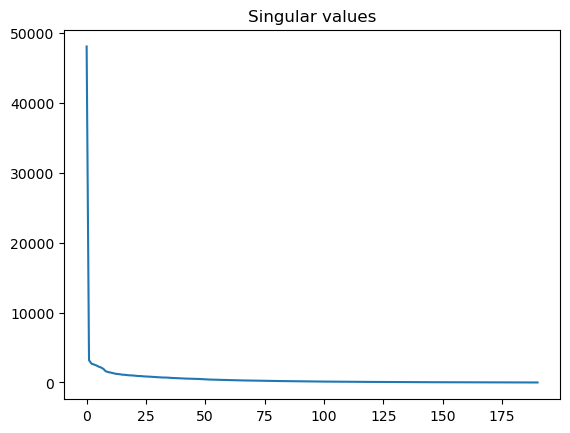

In [7]:
#visualize the vector s
plt.plot(s)
plt.title("Singular values")
plt.show()

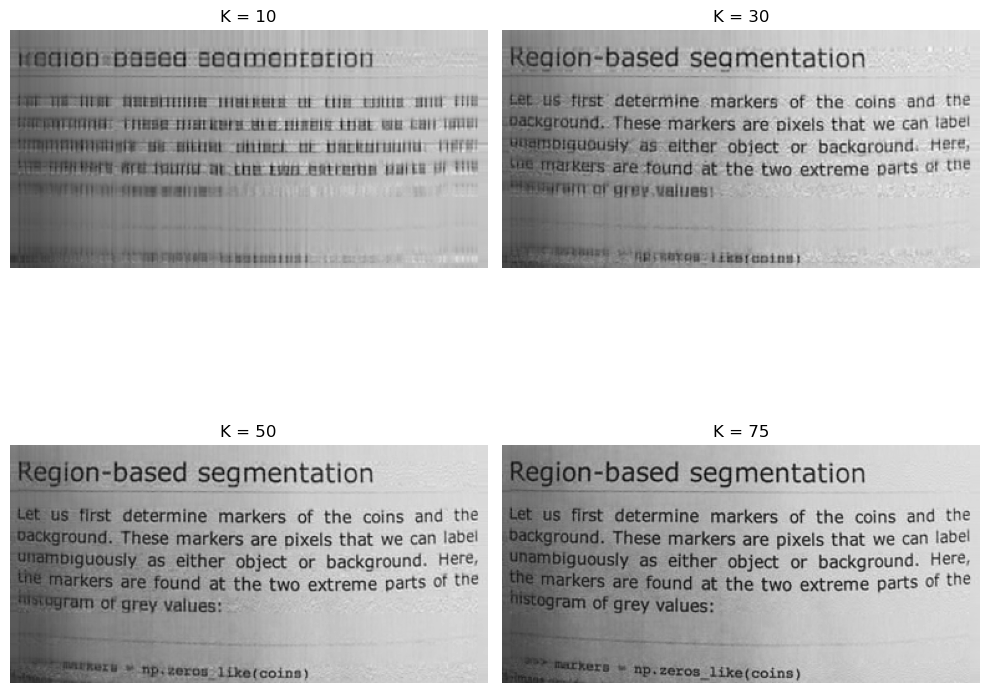

In [8]:
k = [10,30,50,75]

#Truncate the SVD decomposition up to k
plt.figure(figsize=(10,10))
i = 1
for el in k: 
    Uk = U[:, :el]
    Sk = S[:el, :el] 
    VTk = VT[:el, :]

    #Compute Ak
    Ak = Uk @ Sk @ VTk 
    
    plt.subplot(2,2,i)
    i +=1
    plt.title(f"K = {el}")
    plt.imshow(Ak, cmap = "gray")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

Approximation errors for different values of k :[5765.26, 3394.2, 2007.5, 1098.52]


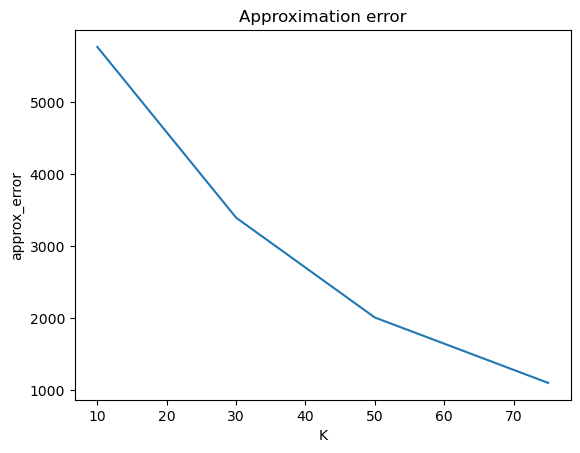

In [9]:
k = [10,30,50,75]
approx_error = []

for el in k: 
    Uk = U[:, :el]
    Sk = S[:el, :el] 
    VTk = VT[:el, :]

    Ak = Uk @ Sk @ VTk 
    
    approx_error.append(round(np.linalg.norm(A-Ak,'fro'),2))
print(f"Approximation errors for different values of k :{approx_error}")

plt.title("Approximation error")
plt.plot(k,approx_error)
plt.xlabel("K") 
plt.ylabel("approx_error")
plt.show()
    

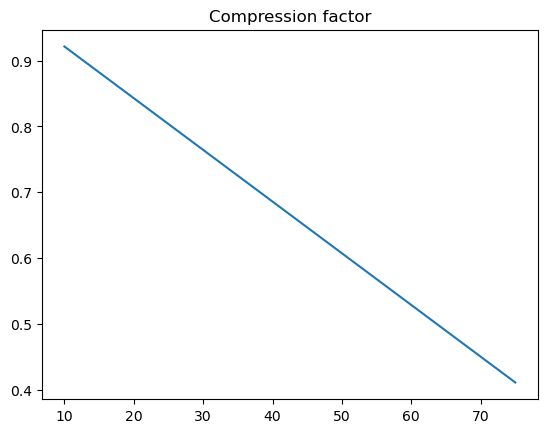

[0.9214659685863874,
 0.7643979057591623,
 0.6073298429319371,
 0.4109947643979057]

In [10]:
k = [10,30,50,75]
ck = []
for el in k:
    num = el*(m+n+1)
    den = m*n
    ck.append(1-(num/den))
plt.title("Compression factor")
plt.plot(k,ck)
plt.show()
ck

In [11]:
#ck equal to 0 means 1- k*(m+n+1)/m*n i.e. k = m*n/ (m+n+1)
k = (m*n)/ (m+n+1)
print(round(k,3))    

127.333


In [15]:
k = 127
Uk = U[:, :k]
Sk = S[:k, :k] 
VTk = VT[:k, :]
Ak = Uk @ Sk @ VTk 
approx_error = np.linalg.norm(A-Ak,2)
print(approx_error)
print(S[k:k+1,k:k+1])

68.3475552112888
[[68.34755521]]


In [95]:
total_energy = sum(s[:k])
print(f"Total energy: {total_energy}")

In [96]:
fex = 1- (approx_error/total_energy)
print(f'Fraction of energy explained: {round(fex*100,2)}%')

Fraction of energy explained: 99.94%


### ########### Classification of MNIST Digits with SVD Decomposition ###########

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
print(data.shape)

(42000, 785)


In [13]:
#Split the dataset into X and Y 
X = data.iloc[:,1:]
print(X.shape)
Y = data.iloc[:,0]
print(Y.shape)

(42000, 784)
(42000,)


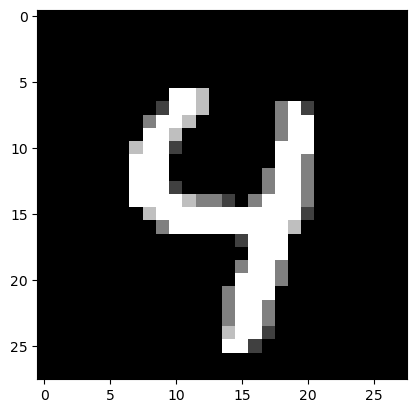

In [14]:
#Create the function to show the digit
def showimm(idx):
    x = X.iloc[idx,:]
    x = np.reshape(x, (28,28))
    
    plt.imshow(x, cmap='gray')
    plt.show()

showimm(78)

In [16]:
# Define the filtered data of digits 3 and 4
filter3or4 = (Y==3) | (Y==4)
X_3or4 = X[filter3or4]
Y_3or4 = Y[(Y==3) | (Y==4)]
print(f"The shape of the filtered X is : {X_3or4.shape}")
print(f"The shape of the filtered Y is : {Y_3or4.shape}")


The shape of the filtered X is : (8423, 784)
The shape of the filtered Y is : (8423,)


In [17]:
#Split the dataset in train and test set
train_size = int(X_3or4.shape[0] * 0.8)

Xtrain = X_3or4.iloc[:train_size,:] 
Xtest = X_3or4.iloc[train_size:,:]
Ytrain = X_3or4.iloc[:train_size]
Ytest = Y_3or4.iloc[train_size:]
print(Xtrain.shape)
print(Xtest.shape)

(6738, 784)
(1685, 784)


In [18]:
#Let's take the C1 and C2
X1 = Xtrain[(Y==3)]#C1
X1 = X1.T
X2 = Xtrain[(Y==4)]#C2
X2 = X2.T

C:\Users\Huawei\AppData\Local\Temp\ipykernel_26540\3193670052.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X1 = Xtrain[(Y==3)]#C1
C:\Users\Huawei\AppData\Local\Temp\ipykernel_26540\3193670052.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X2 = Xtrain[(Y==4)]#C2


In [19]:
U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)
U1.shape

(784, 784)

In [20]:
x = Xtest.iloc[25]

#Project our x test vector onto the spaces of X1 and X2
x1 = U1 @ (U1.T @ x)
x2 = U2 @ (U2.T @ x)

#Calculate the distance between the real x and the projections
d1 = np.linalg.norm(x-x1, 2)
d2 = np.linalg.norm(x-x2, 2)

#Classification
if d1 < d2:
    print('x is classified as 3')
else:
    print('x is classified as 4')
    



x is classified as 3


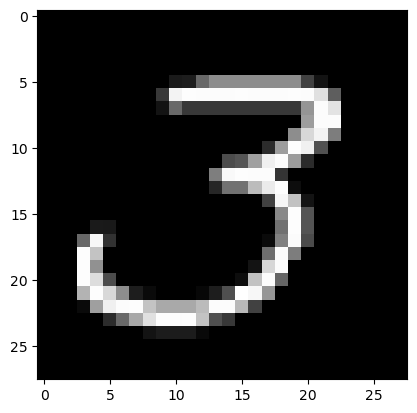

In [21]:
#Visualize it
x = Xtest.iloc[25,:]
x = np.reshape(x, (28,28))
    
plt.imshow(x, cmap='gray')
plt.show()

In [22]:
rightclass = 0
for el in range(len(Xtest)):
    x = Xtest.iloc[el]
    x1 = U1 @ (U1.T @ x)
    x2 = U2 @ (U2.T @ x)

    d1 = np.linalg.norm(x-x1, 2)
    d2 = np.linalg.norm(x-x2, 2)
    
    if d1<d2:
        if Ytest.iloc[el] ==3:
            rightclass +=1
    else:
        if Ytest.iloc[el] == 4:
            rightclass +=1

miss_error = rightclass/len(Xtest)
print(f'The missclassification error for the test set is: {round(1-miss_error,3)}')
    

The missclassification error for the test set is: 0.052


In [23]:
filter389 = (Y==3) | (Y==8) | (Y==9)
X_389 = X[filter389]
Y_389 = Y[filter389]
X_389

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_size_389 = int(X_389.shape[0] * 0.8)

Xtrain_389 = X_389.iloc[:train_size_389,:]
Xtest_389 = X_389.iloc[train_size_389:,:]
Ytest_389 = Y_389.iloc[train_size_389:]
print(Xtrain_389.shape)
print(Xtest_389.shape)
print(Ytest_389.shape)

(10081, 784)
(2521, 784)
(2521,)


In [25]:
X3 = Xtrain_389[(Y==3)]#C1
X3 = X3.T
X8 = Xtrain_389[(Y==8)]#C2
X8 = X8.T
X9 = Xtrain_389[(Y==9)]#C3
X9 = X9.T

C:\Users\Huawei\AppData\Local\Temp\ipykernel_26540\2390307065.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X3 = Xtrain_389[(Y==3)]#C1
C:\Users\Huawei\AppData\Local\Temp\ipykernel_26540\2390307065.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X8 = Xtrain_389[(Y==8)]#C2
C:\Users\Huawei\AppData\Local\Temp\ipykernel_26540\2390307065.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X9 = Xtrain_389[(Y==9)]#C3


In [26]:
U3, s3, VT3 = np.linalg.svd(X3, full_matrices=False)
U8, s8, VT8 = np.linalg.svd(X8, full_matrices=False)
U9, s9, VT9 = np.linalg.svd(X9, full_matrices=False)

In [27]:
rightclass = 0
for el in range(len(Xtest_389)):
    x = Xtest_389.iloc[el]
    x3 = U3 @ (U3.T @ x)
    x8 = U8 @ (U8.T @ x)
    x9 = U9 @ (U9.T @ x)

    d3 = np.linalg.norm(x-x3, 2)
    d8 = np.linalg.norm(x-x8, 2)
    d9 = np.linalg.norm(x-x9, 2)
    
    if d3<d8 and d3<d9:
        if Ytest_389.iloc[el] ==3:
            rightclass +=1
    elif d8<d3 and d8<d9:
        if Ytest_389.iloc[el] == 8:
            rightclass +=1
    elif d9<d3 and d9<d8:
        if Ytest_389.iloc[el] ==9:
            rightclass +=1

miss_error = rightclass/len(Xtest_389)
print(f'The missclassification error for the test set is: {1-miss_error}')
    

The missclassification error for the test set is: 0.12534708449028165
